In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('Results_train.csv')
raw_data.head()

,Marks,Pass
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
data = raw_data.copy()
data['Pass'] = data['Pass'].map({'Yes':1,'No':0})
data.head()

,Marks,Pass
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


In [4]:
y = data['Pass']
x1 = data['Marks']

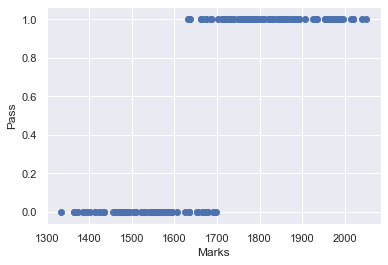

In [5]:
plt.scatter(x1,y)
plt.xlabel('Marks')
plt.ylabel('Pass')
plt.show()

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [7]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Pass   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Dec 2023   Pseudo R-squ.:                  0.7992
Time:                        11:49:26   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
Marks          0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [8]:
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted:0','Predicted:1']
cm_df = cm_df.rename(index={0:'Actual:0', 1:'Actual:1'})
cm_df

,Predicted:0,Predicted:1
Actual:0,67.0,7.0
Actual:1,7.0,87.0


In [9]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9166666666666666

### test data

In [10]:
test = pd.read_csv('Results_test.csv')
test.head()

,Marks,Pass
0,1323,No
1,1725,Yes
2,1762,Yes
3,1777,Yes
4,1665,No


In [11]:
test['Pass'] = test['Pass'].map({'Yes':1,'No':0})
test.head()

,Marks,Pass
0,1323,0
1,1725,1
2,1762,1
3,1777,1
4,1665,0


In [17]:
test_actual = test['Pass']
test_data = test.drop(['Pass'], axis=1)

In [18]:
test_data = sm.add_constant(test_data)

In [19]:
test_data

,const,Marks
0,1.0,1323
1,1.0,1725
2,1.0,1762
3,1.0,1777
4,1.0,1665
5,1.0,1556
6,1.0,1731
7,1.0,1809
8,1.0,1930
9,1.0,1708


In [20]:
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracy

In [21]:
cm = confusion_matrix(test_data, test_actual, results_log)
cm

(array([[ 4.,  2.],
        [ 1., 12.]]),
 0.8421052631578947)